#  Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

### Import Required Libraries:

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

🔍 Step-by-Step EDA Workflow

📌 1. Understand the Data

Load the dataset (pd.read_csv(), etc.)

Check shape: df.shape

Preview: df.head(), df.tail()

Data types: df.dtypes

Info summary: df.info()

## Understand the Data

In [74]:
## load the feature store dataset as dataframe
wafers = pd.read_csv(r"C:\Users\sujen\OneDrive\Desktop\Ad_project\ML_Project\Semiconductor-Fault-Detection\Notebook\Data\wafer_23012020_041211.csv")

In [75]:
wafers.head()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [76]:
wafers.tail()

,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
95,Wafer-896,3013.66,2526.44,2185.2111,1141.6306,0.8447,100.0,100.5978,0.1217,1.5337,...,NaN,0.5013,0.0076,0.0021,1.5152,0.0153,0.0048,0.0017,31.0176,-1
96,Wafer-897,2982.87,2477.01,2315.2667,2360.1325,1.1259,100.0,90.1144,0.1160,1.4695,...,NaN,0.5003,0.0106,0.0028,2.1263,0.0153,0.0048,0.0017,31.0176,1
97,Wafer-898,3084.82,2387.42,2171.5000,1028.4440,0.7899,100.0,101.5122,0.1224,1.3603,...,NaN,0.5016,0.0130,0.0028,2.5865,0.0153,0.0048,0.0017,31.0176,-1
98,Wafer-899,2955.87,2541.89,NaN,NaN,NaN,NaN,NaN,NaN,1.4493,...,NaN,0.5023,0.0140,0.0033,2.7810,0.0153,0.0048,0.0017,31.0176,-1
99,Wafer-900,2914.86,2465.11,2210.2778,2120.5760,1.0700,100.0,95.1089,0.1230,1.5817,...,NaN,0.5026,0.0121,0.0032,2.4064,0.0153,0.0048,0.0017,31.0176,1


### Analyze 

unnamed: 0 Column

This is likely just an index column that got saved into the CSV.

✅ wafers

In [45]:
wafers.drop(columns = ["Unnamed: 0", 'Good/Bad']).iloc[:100].to_csv("test.csv", index = False)

This is your pandas DataFrame — it likely contains your full wafer dataset.

✅ .drop(columns = ["Unnamed: 0", 'Good/Bad'])

This removes two columns:

"Unnamed: 0" — likely an unnecessary index column

'Good/Bad' — your target/label column, which you’re removing here

You're now left with only the sensor features


✅ .iloc[:100]

This selects the first 100 rows (samples) from the remaining DataFrame.

✅ .to_csv("test.csv", index=False)

This writes the selected 100 rows and all sensor columns to a file named test.csv

index=False ensures the row index numbers are not written to the CSV file

📂 Final Output

A file test.csv that contains:

Only sensor data

Only first 100 wafers

No index column

No "Unnamed: 0" or 'Good/Bad' column

✅ Why Do This?

This is often done to:

Create a test sample file to check data format

Export a feature-only dataset for predictions

Separate test/inference data from training data

In [77]:
### replace the column unnamed: 0 as wafer
wafers.rename(columns={"Unnamed: 0": "Wafer"}, inplace= True)

In [78]:
## check 
wafers.head(2)

,Wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1


In [79]:
wafers.shape

(100, 592)

100 rows → representing 100 wafer samples

592 columns 

590 sensor features

1 target column ("Good/Bad")

In [80]:
wafers.dtypes

Wafer          object
Sensor-1      float64
Sensor-2      float64
Sensor-3      float64
Sensor-4      float64
               ...   
Sensor-587    float64
Sensor-588    float64
Sensor-589    float64
Sensor-590    float64
Good/Bad        int64
Length: 592, dtype: object

🧬 Data Structure Summary (df.dtypes):

| Column                     | Data Type                                   |
| -------------------------- | ------------------------------------------- |
| `Wafer`                    | `object` (i.e., string/ID like `Wafer`) |
| `Sensor-1` to `Sensor-590` | `float64` (sensor readings)                 |
| `Good/Bad`                 | `int64` (target variable: 0/1 or -1/1)      |
| **Total Columns**          | **592**                                     |


In [81]:
## Train-Test Split

from sklearn.model_selection import train_test_split

wafers, wafers_test = train_test_split(wafers, test_size=.20, random_state=42)

In [82]:
wafers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, Wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


🧾 Summary of Your DataFrame:

| Attribute        | Value                                                 |
| ---------------- | ----------------------------------------------------- |
| **Rows**         | 80 entries (index 55 to 51, probably after filtering) |
| **Columns**      | 592 columns                                           |
| **Data Types**   |                                                       |
| • `float64`      | 494 columns (sensor readings)                         |
| • `int64`        | 97 columns (flags, binary sensors, target?)           |
| • `object`       | 1 column (likely `Wafer` ID)                          |
| **Memory Usage** | \~370.6 KB                                            |


📌 Key Insights:

1. ✅ You likely filtered out some rows (originally had 100)

This might be after:

Removing missing values

Dropping sparse sensors

Filtering only certain wafers

You now have 80 clean samples left.

2. ✅ Columns are still the same — 592 total

Breakdown:

1 object column → Wafer ID

494 float64 → continuous sensor data

97 int64 → binary sensor flags + possibly the Good/Bad column

In [83]:
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


📊 Insights:

✅ 1. Fewer Missing Values

You now have:

Most sensors with full count = 80

But some still missing (e.g., Sensor-1: count = 79, Sensor-582: count = 27)

Sensor-582 is still highly sparse → should be dropped

##  Analyze Missing Data:

Firstly, we'll check the missing data in the target feature and drop those records. **As if we already know a value of target feature then there's no need for a ML algorithm, damn right?** Therefore, the best way to deal with missing target entries is to delete them. For other missing features, we can definitely use impute strategies.

In [84]:
## Check missing vals in target feature

wafers["Good/Bad"].isna().sum()

0

In [85]:
wafers.isna().sum().sum()

1822

In [86]:
## Check missing vals in dependent feature variables
wafers.isna().sum().sum() / (wafers.shape[0] * (wafers.shape[1] - 1))

0.038536379018612524

✅ Interpretation:

wafers.isna().sum().sum() → Total number of missing values in the entire DataFrame.

wafers.shape[0] * (wafers.shape[1] - 1) → Total number of feature cells (excluding the target column Good/Bad).

💡 Result:

Output: 0.0385 = 3.85% missing values in feature columns

Since this is a relatively low amount of missing data (~4%), you can safely:

Impute using mean or median (safer for skewed features):

## Visualization of Sensors' distribution:

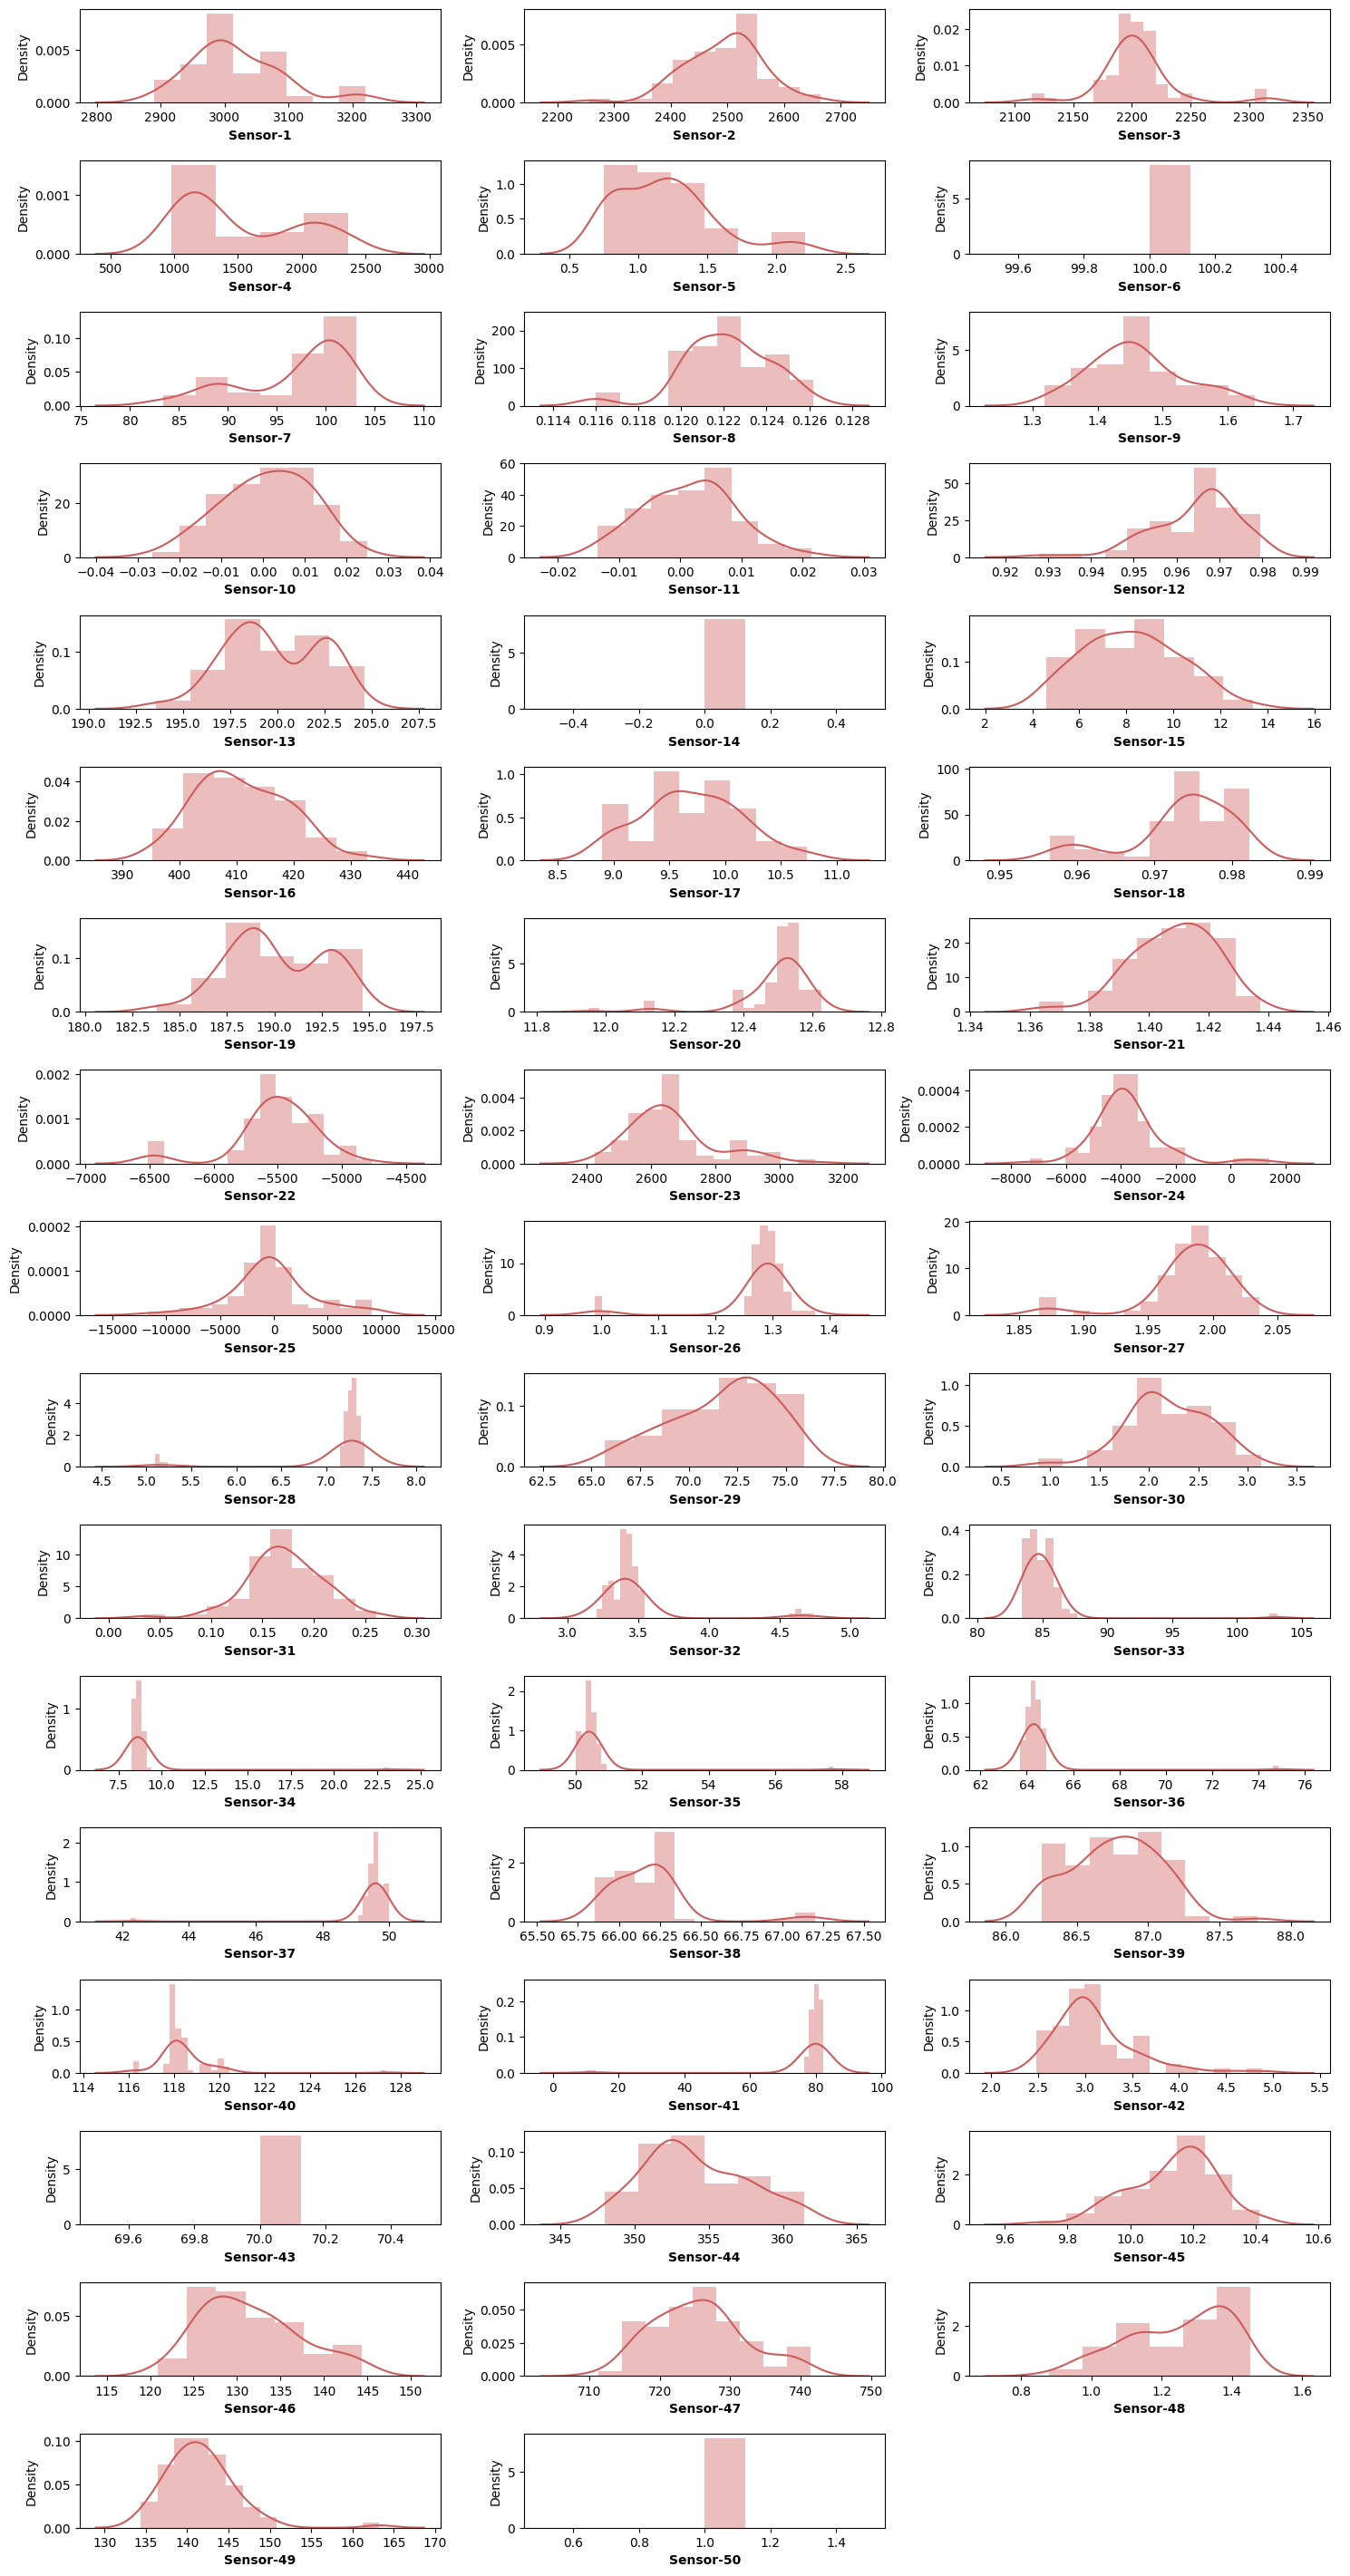

In [87]:
# let's have a look at the distribution first 50 sensors of Wafers

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [88]:
# Select 50 random sensors

random_50_sensors_idx = []
for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1, 591))

range(1, 591) includes all sensor indices from Sensor-1 to Sensor-590 (assuming columns are named that way).

replace=False ensures no duplicates.

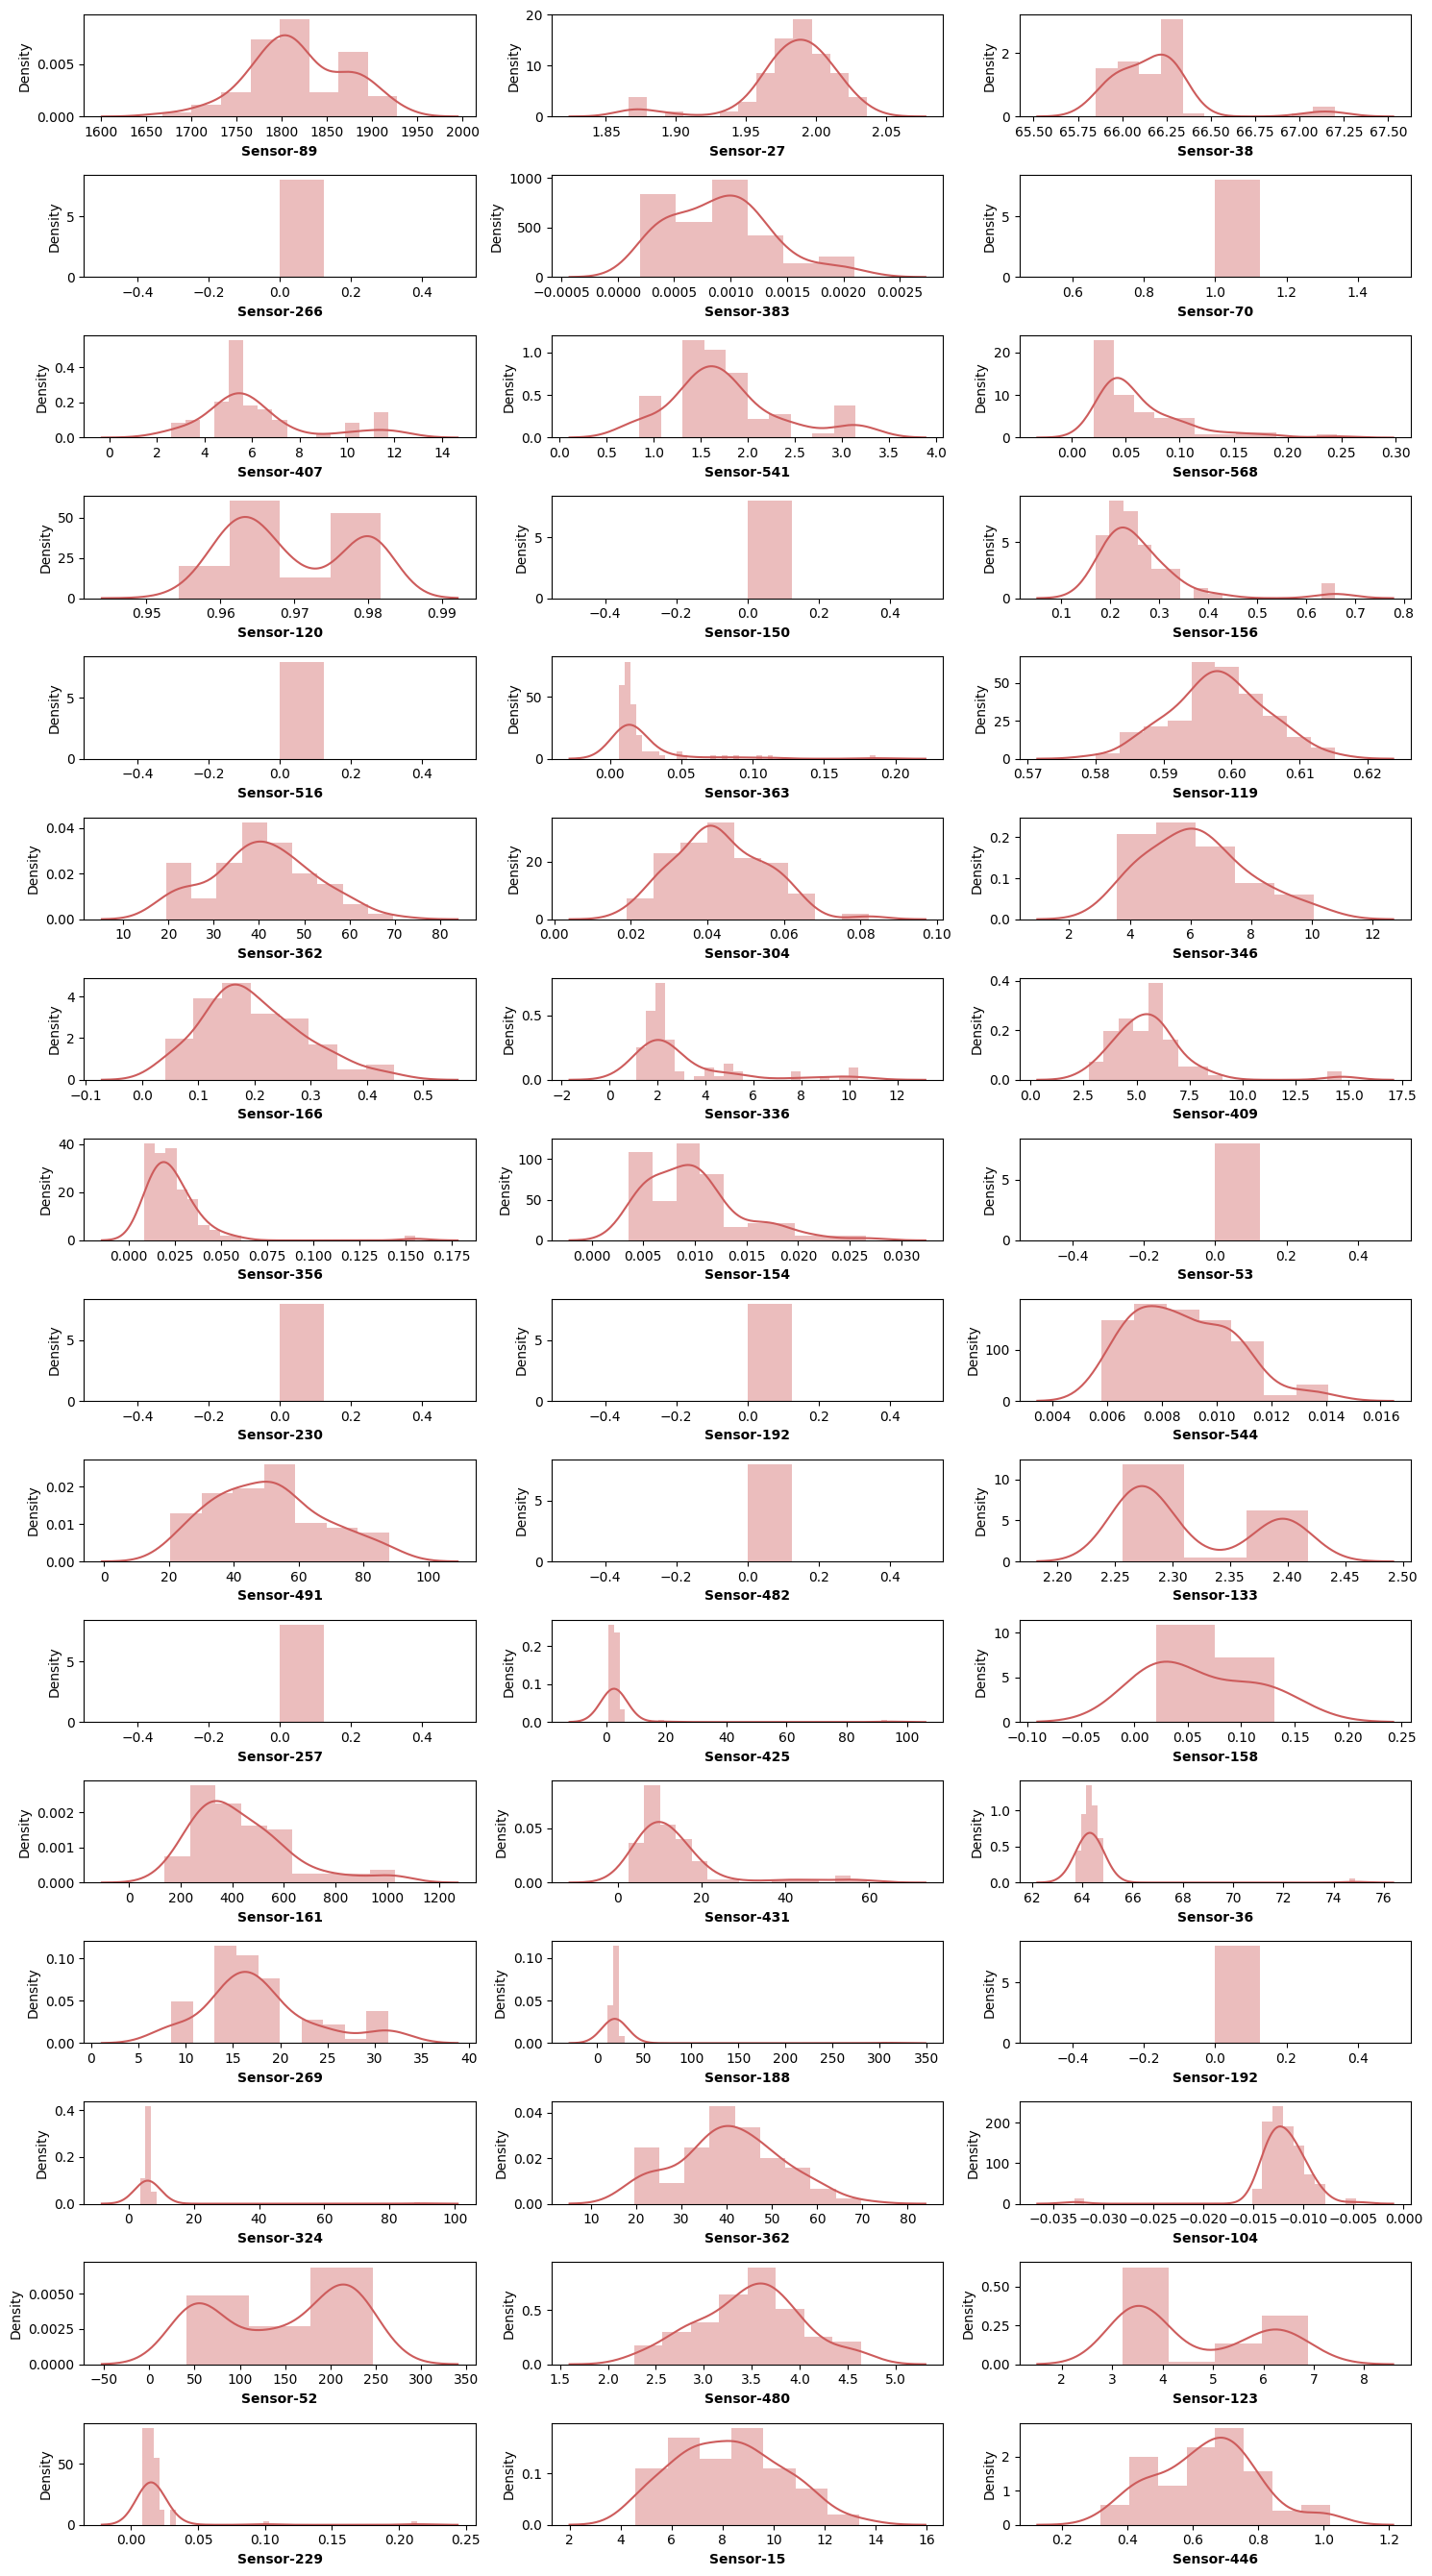

In [89]:
# let's now, have a look at the distribution of random 50 sensors

plt.figure(figsize=(15, 100))

for i, col in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=wafers[col], color='indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

In [90]:
def get_cols_with_zero_std_dev(df: pd.DataFrame):
    """
    Returns a list of columns names who are having zero standard deviation.
    """
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']  # numerical cols only
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame, missing_thresh=.7):
    """
    Returns a list of columns having missing values more than certain thresh.
    """
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_thresh].index)
    return cols_to_drop        

In [91]:
## Columns w missing vals more than 70%

cols_to_drop_1 = get_redundant_cols(wafers, missing_thresh=.7)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [92]:
## Columns w 0 Standard Deviation

cols_to_drop_2 = get_cols_with_zero_std_dev(df=wafers)
cols_to_drop_2.append("Wafer")
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [93]:
## Cols to drop

cols_to_drop = cols_to_drop_1 + cols_to_drop_2

**=>** Features that are not gonna contribute to ML algorithm in anyway

## Separate Features and Labels out:

In [94]:
## Separate features and Labels out

X, y = wafers.drop(cols_to_drop, axis=1), wafers[["Good/Bad"]]

In [96]:
## Dependent feature variables

print("Shape of the features now: ", X.shape)
X.head()

Shape of the features now:  (80, 465)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,-0.0066,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,0.0135,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,-0.0064,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,0.0037,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [97]:
## Independent/Target Variables
print("Shape of the labels: ", y.shape)
y.head()

Shape of the labels:  (80, 1)


,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1
